Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/Colab Notebooks/opencv
Размер картинки = (320, 480, 3)
Координаты от верхнего левого угла


Text(0.5, 1.0, 'Пример распознавания цвета')

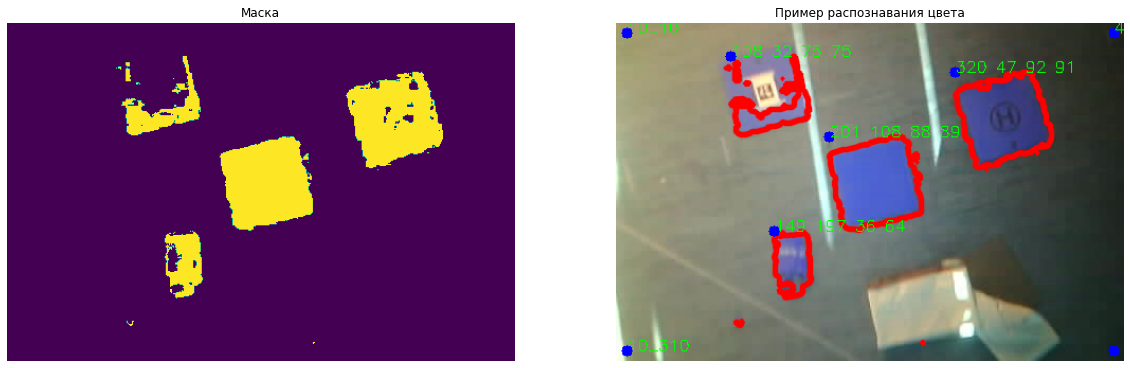

In [30]:
import requests
import numpy as np
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt #for colab

#подключаю диск
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/Colab Notebooks/opencv
fn = '440.jpg'
img = cv.imread(fn)

## для загрузки файла из сети, потом заменим на объект из дрона
#response = requests.get('https://github.com/ashmarev/triada/raw/main/440.jpg')
#image_byte_str = response.content
#img_array = np.frombuffer(image_byte_str, np.uint8)
#img = cv.imdecode(img_array, cv.IMREAD_ANYCOLOR)

# https://github.com/methylDragon/opencv-python-reference
# https://robotclass.ru/tutorials/opencv-moments-color-object-search/

# меняем цветовую модель с BGR на HSV 
hsv = cv.cvtColor( img, cv.COLOR_BGR2HSV ) 
# применяем цветовой фильтр
# https://stackoverflow.com/questions/10948589/choosing-the-correct-upper-and-lower-hsv-boundaries-for-color-detection-withcv

hsv_min = np.array((0, 20, 20), np.uint8) #H and S, and set v in range(20, 255).
hsv_max = np.array((20, 255, 255), np.uint8)
mask = cv.inRange( hsv, hsv_min, hsv_max )

# ищем контуры и складируем их в переменную contours
contours, hierarchy = cv.findContours( mask.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# отображение контуров на исходной картинке
cv.drawContours(img, contours, -1, (255,0,0), 3, cv.LINE_AA, hierarchy, 1 ) #красный цвет

# для нескольких пятен (берём координаты верхней левой точки)
for i in range (0, len(contours)):
  x, y, w, h = cv.boundingRect(contours[i])
  if w > 10 and h > 10:
    cv.circle(img, (x, y), 5, (0,0,255), -1) #синий цвет
    coordinate = str(x) + str(' ') + str(y) + str(' ') + str(w) + str (' ') + str (h)
    cv.putText(img, coordinate, (x, y), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0)) #зеленый цвет

cv.circle(img, (10, 10), 5, (0,0,255), -1) #синий цвет
cv.putText(img, str('10_10'), (10, 10), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0)) #зеленый цвет
cv.circle(img, (470, 10), 5, (0,0,255), -1) #синий цвет
cv.putText(img, str('470_10'), (470, 10), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0)) #зеленый цвет
cv.circle(img, (10, 310), 5, (0,0,255), -1) #синий цвет
cv.putText(img, str('10_310'), (10, 310), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0)) #зеленый цвет
cv.circle(img, (470, 310), 5, (0,0,255), -1) #синий цвет
cv.putText(img, str('470_310'), (470, 10), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0)) #зеленый цвет

## вычисляем координаты (это работает только для одного пятна)
#moments = cv.moments(mask, 1)
#print(moments)
#m01 = moments['m01']
#m10 = moments['m10']
#area = moments['m00']
#x = int(m10 / area)
#y = int(m01 / area)
#cv.circle(img, (x, y), 5, (0,0,255), -1)

print('Размер картинки = ' + str(img.shape))
print('Координаты от верхнего левого угла')

figsize = (20, 10)
fig = plt.figure(figsize=figsize)
rows = 1
columns = 2
fig.add_subplot(rows, columns, 1)
plt.imshow(mask)
plt.axis('off')
plt.title('Маска')
fig.add_subplot(rows, columns, 2)
plt.imshow(img)
plt.axis('off')
plt.title('Пример распознавания цвета')